In [1]:
import pandas as pd

In [19]:
df = pd.read_csv('rural_urban.csv')
df.rename(columns = {'ano':'Collision Number', 'tway':'Trafficway','typ':'Type of Record (L-Location data)', 'day':'Day of Week',
                 'rai':'On Route Auxiliary','loa':'Lane Number of Collision','odr':'Base Distance Direction', 'alc':'Light Condition', 'wcc':'Weather Condition',
                 'ahc':'Road Condition', 'rsc':'Road Surface Conition', 'hel':'First Harmful Event Location',
                 'xwk':'Crosswalk Indicator', 'dat':'Date of Collision', 'als':'On Route Street Name','jur':'Investigating Jurisdiction Code', 
                 'fat':'Number of Fatalities', 'inj':'Number of Non-Fatal Injuries','acd':'Amended or Corrected Indicator', 'bir':'Base Intersection Route Category', 
                 'bra':'Base Intersection Route Auxiliary', 'sic':'Second Intersection Route Category', 'sra':'Second Intersection Route Auxiliary', 'alsb':'Base Intersection Street Name',
                 'bus':'Number of Buses', 'trm':'Number of Persons Transported Immediately', 'tow':'Number of Towed Units',
                 'lat':'Latitude of Collision (special format)', 'lon':'Longitude of Collision (special format)', 'jct':'Junction Type','ocf1':'Other Contributing Factor 1','ocf2':'Other Contributing Factor 2','ocf3':'Other Contributing Factor 3',
                 'ocf4':'Other Contributing Factor 4', 'ibus':'School Bus Involved', 'wzn':'Work Zone Indicator','wzt':'Work Zone Type',
                 'wzl':'Work Zone Location','wpr':'Workers Present Indicator','bno':'Currently Junk field, was Badge Number of Investigating Officer',
                 'tct':'Traffic Control Type','unt':'Number of Units (Vehicle and Non-Motorists)','cty':'County of Collision',
                 'fhe':'First Harmful Event','prc':'Primary Contributing Factor','rct':'On Route Category','adid':'Alcohol/Drug Involved Driver in Collision',
                 'dlr':'Direction of Lane', 'rtn':'On Route Street Number','brn':'Base Intersetion Street Number','srn':'Second Intersection Street Number', 'tim':'Military Time of Collision',
                 'bdo':'Base Distance Offset (from collision location to the base intersection in miles)','pnt':'Military Time of Police Notification', 'pat':'Military Time of Police Arrival at Scene',
                 'alss':'Second Intersection Street Name','hzd':'Currently Junk field'}, inplace = True)
# unt.rename(columns = {'adi':'Alcohol/Drug Information','ano':'Collision Number','api':'Action Prior to Impact','atg':'Alcohol Test Given', 'atr2':'Alcohol Test Results','att':'Alcohol Test Type',
#                      'aun':'Unit Number','bdt':'Vehicle Body Type','cdl':'CDL licensed required','cn2':'Citation Violation Code 2','csn':'Citation Violation Code 1','cta':'Contributed to Collision',
#                      'dtc':'Drivers License Class','dls':'Drivers License State','dot':'Direction of Travel','drac':'Driver Race','dsex':'Driver Sex','dtg':'Drug Test Given','dtr':'Drug Test Results',
#                      'dtt':'Drug Test Type','ead':'Unit Damage(in dollars)','ecs':'Estimated Collision Speed','edam':'Extent of Deformity','edp':'Property Damage','fda':'First Deformed Area','man':'Manner of Collision',
#                      'mda':'Most Deformed Area','mhe':'Most Harmful Event','noc':'Number of Occupants','pd2':'Property Damage 2','rps':'Vehicle Registration Plate State','soe1':'Sequence of Events1','soe2':'Sequence of Events2',
#                      'soe3':'Sequence of Events3','soe4':'Sequence of Events4','spl':'Speed Limit','tbr':'Truck/Bus Supplemental Form Required','towd':'Towed','uor':'Underride / Override','utc':'Unit Type','vat':'Vehicle Attachments',
#                      'vin':'Vehicle Identification Number','vmk':'Vehicle Make','vry':'Vehicle Registration Plate Year','vuc':'Vehicle Use', 'dlc':'Drivers License Class'}, inplace = True)

df.head()

,Unnamed: 0,Collision Number,Trafficway,Type of Record (L-Location data),Day of Week,On Route Auxiliary,Lane Number of Collision,Base Distance Direction,Light Condition,Weather Condition,...,Primary Contributing Factor,Military Time of Collision,Base Distance Offset (from collision location to the base intersection in miles),Military Time of Police Notification,Military Time of Police Arrival at Scene,On Route Category,Alcohol/Drug Involved Driver in Collision,Direction of Lane,CountyName,Rural/Urban Status
0,0,18000001,1,L,6,0.0,1.0,S,1,1,...,2,948,0001,948,952,2,NO,S,"Calhoun County, South Carolina",Completely Rural
1,1,18000002,2,L,2,0.0,2.0,N,5,1,...,8,145,0000,150,155,4,NO,N,"Charleston County, South Carolina",Urban
2,2,18000003,3,L,2,0.0,3.0,S,5,1,...,16,150,0050,151,156,3,YES,N,"Charleston County, South Carolina",Urban
3,3,18000004,4,L,2,0.0,2.0,E,5,1,...,16,218,0000,218,218,5,YES,E,"Charleston County, South Carolina",Urban
4,4,18000005,1,L,2,0.0,2.0,S,2,3,...,7,715,0002,716,725,5,NO,N,"Charleston County, South Carolina",Urban


In [20]:
df = df[['Number of Fatalities','Number of Non-Fatal Injuries','CountyName', 'Rural/Urban Status', 'Unnamed: 0']]
df.head()

,Number of Fatalities,Number of Non-Fatal Injuries,CountyName,Rural/Urban Status,Unnamed: 0
0,0.0,1.0,"Calhoun County, South Carolina",Completely Rural,0
1,0.0,1.0,"Charleston County, South Carolina",Urban,1
2,0.0,0.0,"Charleston County, South Carolina",Urban,2
3,0.0,1.0,"Charleston County, South Carolina",Urban,3
4,0.0,0.0,"Charleston County, South Carolina",Urban,4


In [27]:
aggregation_functions = {'Rural/Urban Status': 'first', 'Number of Fatalities': 'sum', 'Number of Non-Fatal Injuries': 'first'}
df_new = df.groupby(df['CountyName']).aggregate(aggregation_functions)
print(df_new)

                                    Rural/Urban Status  Number of Fatalities  \
CountyName                                                                     
Abbeville County, South Carolina          Mostly rural                   3.0   
Aiken County, South Carolina                     Urban                  25.0   
Allendale County, South Carolina          Mostly rural                   4.0   
Anderson County, South Carolina                  Urban                  44.0   
Bamberg County, South Carolina            Mostly rural                   3.0   
Barnwell County, South Carolina           Mostly rural                   1.0   
Beaufort County, South Carolina                  Urban                  21.0   
Berkeley County, South Carolina                  Urban                  34.0   
Calhoun County, South Carolina        Completely Rural                   8.0   
Charleston County, South Carolina                Urban                  65.0   
Cherokee County, South Carolina         

In [29]:
df_new = pd.DataFrame(df_new)
df_new = df_new.reset_index()
df_new.head()

,CountyName,Rural/Urban Status,Number of Fatalities,Number of Non-Fatal Injuries
0,"Abbeville County, South Carolina",Mostly rural,3.0,3.0
1,"Aiken County, South Carolina",Urban,25.0,0.0
2,"Allendale County, South Carolina",Mostly rural,4.0,0.0
3,"Anderson County, South Carolina",Urban,44.0,1.0
4,"Bamberg County, South Carolina",Mostly rural,3.0,1.0


In [40]:
colors = {'Urban': 'r', 'Mostly Rural': 'b', 'Completely Rural': 'g'}
df_new['Rural/Urban Status'].map(colors)
df_new['Number of Fatalities'].plot(kind='bar', color=[colors[color] for color in df_new['Rural/Urban Status']])

KeyError: 'Mostly rural'

<Axes: xlabel='CountyName'>

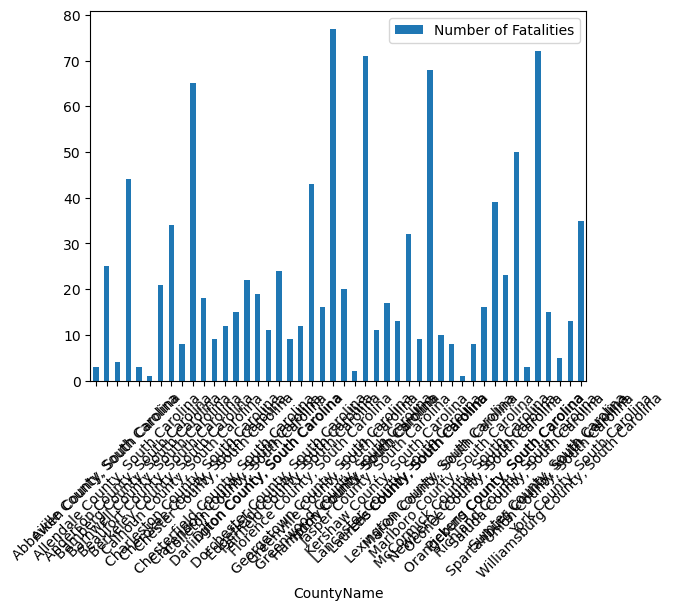

In [44]:
df_new.plot.bar(x='CountyName', y='Number of Fatalities', rot=45)